In [2]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [3]:
# Read Cleaned Standarized Data (See main.ipynb)

df = pd.read_csv("Data/Clean_Standard_Data.csv")
df

,Support Calls,Total Spend,Contract Length_Monthly,Payment Delay,Age,Gender_Male,Gender_Female,Churn
0,0.053192,0.441055,-0.525226,-0.413769,0.260117,0.895850,-0.895850,0
1,0.053192,0.041446,-0.525226,0.887823,-0.608036,0.895850,-0.895850,1
2,-0.265930,-0.333698,-0.525226,0.177863,0.023348,0.895850,-0.895850,0
3,0.372313,0.534841,-0.525226,-1.360382,0.575809,0.895850,-0.895850,1
4,-0.265930,0.620472,-0.525226,-0.058790,0.260117,0.895850,-0.895850,0
...,...,...,...,...,...,...,...,...
449423,-0.265930,0.008824,-0.525226,-0.177116,0.733655,-1.116256,1.116256,0
449424,-0.265930,1.399303,-0.525226,0.651170,0.102271,-1.116256,1.116256,0
449425,-0.265930,-1.503983,-0.525226,0.532843,1.522885,-1.116256,1.116256,1
449426,-0.585051,1.109790,1.903938,1.479456,-0.923728,-1.116256,1.116256,1


In [4]:
# Shuffle and sample the dataset (downsample to 5000 examples)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df = df[:100000]
features = df[df.columns[:-1]]
target = df["Churn"]

X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.1, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=420)

In [5]:

# Shape of all train, test, and validation 
print("- - -" * 7)
print(f"Shape of Features {features.shape}")
print(f"Shape of Target {target.shape}")
print("- - -" * 7 + "\n")
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_val {X_val.shape}")
print(f"Shape of X_test {X_test.shape}")
print("- - -" * 7 + "\n")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_val {y_val.shape}")
print(f"Shape of y_test {y_test.shape}")
print("- - -" * 7 + "\n")
print(f"Train is {round(X_train.shape[0] / features.shape[0], 2) * 100}% of total")
print(f"Test is {round(X_test.shape[0] / features.shape[0], 2) * 100}% of total")
print(f"Val is {round(X_val.shape[0] / features.shape[0],2) * 100}% of total")
print("- - -" * 7 + "\n")

# Class distribution in original and splits
pct_1_df = df["Churn"].mean()
pct_0_df = 1 - pct_1_df
print(f"% of 0's in df: {pct_0_df}")
print(f"% of 1's in df: {pct_1_df}")

pct_1_train = y_train.mean()
pct_0_train = 1 - pct_1_train
print(f"% of 0's in y_train: {pct_0_train}")
print(f"% of 1's in y_train: {pct_1_train}")

pct_1_val = y_val.mean()
pct_0_val = 1 - pct_1_val
print(f"% of 0's in y_val: {pct_0_val}")
print(f"% of 1's in y_val: {pct_1_val}")

pct_1_test = y_test.mean()
pct_0_test = 1 - pct_1_test
print(f"% of 0's in y_test: {pct_0_test}")
print(f"% of 1's in y_test: {pct_1_test}")

- - -- - -- - -- - -- - -- - -- - -
Shape of Features (100000, 7)
Shape of Target (100000,)
- - -- - -- - -- - -- - -- - -- - -

Shape of X_train (81000, 7)
Shape of X_val (9000, 7)
Shape of X_test (10000, 7)
- - -- - -- - -- - -- - -- - -- - -

Shape of y_train (81000,)
Shape of y_val (9000,)
Shape of y_test (10000,)
- - -- - -- - -- - -- - -- - -- - -

Train is 81.0% of total
Test is 10.0% of total
Val is 9.0% of total
- - -- - -- - -- - -- - -- - -- - -

% of 0's in df: 0.5
% of 1's in df: 0.5
% of 0's in y_train: 0.5001851851851852
% of 1's in y_train: 0.4998148148148148
% of 0's in y_val: 0.5067777777777778
% of 1's in y_val: 0.49322222222222223
% of 0's in y_test: 0.49239999999999995
% of 1's in y_test: 0.5076


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import sys

sys.stdout.flush()

# Define the model
mlp = MLPClassifier(max_iter=250, random_state=42, early_stopping=True)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50), (25,25,25), (100, 250, 250, 100)],
    'activation': ["logistic", 'tanh', 'relu'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['adaptive'],
}

sys.stdout.flush()

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 250, 250, 100), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best Validation Accuracy: 0.9154197530864197


In [29]:
from sklearn.metrics import classification_report

test_acc = mlp.score(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100}")  

y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

Test Accuracy: 91.7
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4924
           1       0.88      0.97      0.92      5076

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import sys


# Train the most optimal model one epoch at a time, this allows us to print acc and loss better
# Allows us to tune for epoch value as well.

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 250, 250, 100), 
    max_iter=1, 
    learning_rate="adaptive", 
    solver="sgd", 
    random_state=42, 
    activation="relu", 
    alpha=0.01)

epochs = 175

val_acc = []
train_acc = []

train_losses = []
val_losses = []

# Allows model to be trainned one epoch at a time
classes = np.unique(y_train) 
print("STARTING")
for epoch in range(epochs):

    # Helps with weird warning 
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        # Fit one epoch at time
        mlp.partial_fit(X_train, y_train, classes=classes)

    # Get train and validation acc
    train = accuracy_score(y_train, mlp.predict(X_train))
    val = accuracy_score(y_val, mlp.predict(X_val))

    # Get cross entropy loss for train and val
    y_train_proba = mlp.predict_proba(X_train)
    y_val_proba = mlp.predict_proba(X_val)

    train_loss = log_loss(y_train, y_train_proba)
    val_loss = log_loss(y_val, y_val_proba)

    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_acc.append(train)
    val_acc.append(val)

    print(f"Epoch {epoch + 1}: Train Acc = {train:.4f} | Val Acc = {val:.4f}")


STARTING


c:\Users\Justin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


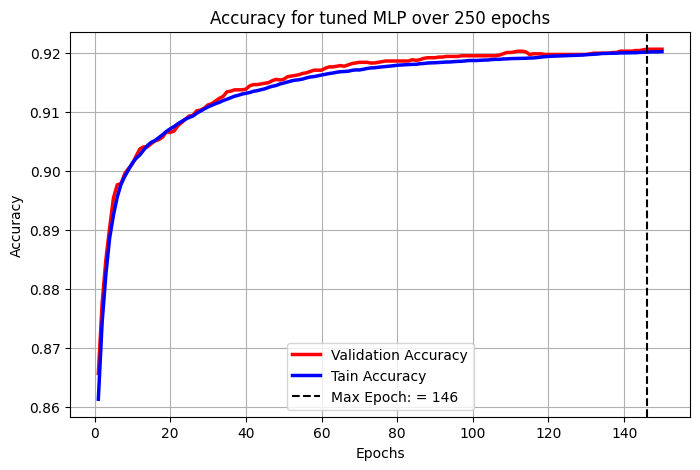

In [ ]:
# Plot accuracy vs. K
import matplotlib.pyplot as plt

best_index = np.argmax(val_acc)
best_epoch = (best_index + 1)

plt.figure(figsize=(8, 5))
np_arr = np.array(val_acc)
plt.plot([i for i in range(1,151)], val_acc, color="Red", label="Validation Accuracy", linewidth=2.5)
plt.plot([i for i in range(1,151)], train_acc, color="Blue", label="Tain Accuracy", linewidth=2.5)
plt.axvline(x=best_epoch, color="black", linestyle="--", label=f"Best Epoch: = {best_epoch}")

plt.title("Accuracy for tuned MLP over 250 epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

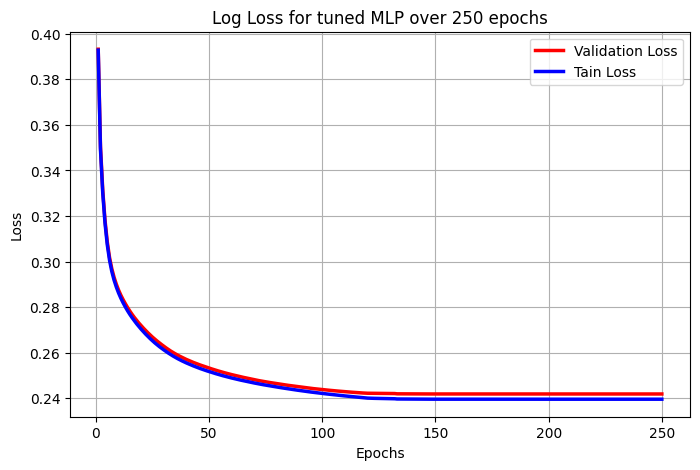

In [ ]:
plt.figure(figsize=(8, 5))
np_arr = np.array(val_acc)

plt.plot([i for i in range(1,251)], val_losses, color="Red", label="Validation Loss", linewidth=2.5)
plt.plot([i for i in range(1,251)], train_losses, color="Blue", label="Tain Loss", linewidth=2.5)

#plt.axvline(x=max_k, color="black", linestyle="--", label=f"Best K = {max_k}")
plt.title("Log Loss for tuned MLP over 250 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend() 
plt.grid(True)
plt.show()

In [1]:
from sklearn.metrics import classification_report


y_pred = mlp.predict(X_test)
print(classification_report(y_test, y_pred))

test_acc = mlp.score(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100}")  

NameError: name 'mlp' is not defined